In [1]:
pw='hellowilliam'

In [2]:
import mysql.connector
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
import pandas as pd
import seaborn as sns

# Search For Movies

In [17]:
titleInput = widgets.Text(
    value = '',
    placeholder='Browse By Title...',
    description='',
    disabled=False
)
display(titleInput)

def browseByTitle(titleInput):
    clear_output(wait=True)
    cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
    cursor = cnx.cursor()
    query = "SELECT * FROM NetflixOriginals_SQL WHERE title LIKE '%" + str(titleInput.value) + "%' ;"
    cursor.execute(query)
    i=1
    for name in cursor:
        print("Result "+ str(i)+ ": " + name[1] + ", a " + name[2] + " that was released on " + name[3] + ". Offered in " + name[6] + ", this " + str(name[4]) + " minute movie recieved an IMDB rating of " + str(name[5]) + ".\n\n")
        i+=1
    cursor.close()
    cnx.close()

titleInput.on_submit(browseByTitle)

Text(value='', placeholder='Browse By Title...')

In [5]:
ratingInput = widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Greater Than Rating:',
    style={'description_width': 'initial'},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(ratingInput)

button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
display(button)

def browseByRating(b):
    cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
    cursor = cnx.cursor()
    #query = "SELECT * FROM NetflixOriginals_SQL WHERE IMDB_Score >= 5;"
    query = "SELECT * FROM NetflixOriginals_SQL WHERE IMDB_Score >=" + str(ratingInput.value) + ";"
    cursor.execute(query)
    i=1
    for name in cursor:
        print("Result "+ str(i)+ ": " + name[1] + ", a " + name[2] + " that was released on " + name[3] + ". Offered in " + name[6] + ", this " + str(name[4]) + " minute movie recieved an IMDB rating of " + str(name[5]) + ".\n\n")
        i+=1
    cursor.close()
    cnx.close()
    #name[0] = id, name[1] = title, name[2] = Genre, name[3] = release date, name[4] = runtime, name[5] = IMDB score
    #name[6] = language


    
button.on_click(browseByRating)


FloatSlider(value=7.5, continuous_update=False, description='Greater Than Rating:', max=10.0, readout_format='…

Button(description='Search', icon='check', style=ButtonStyle(), tooltip='Click me')

Result 1: Struggle: The Life and Lost Art of Szukaiski, a Documentary that was released on December 21, 2018. Offered in English, this 105 minute movie recieved an IMDB rating of 8.0.


Result 2: Chasing Coral , a Documentary that was released on July 14, 2017. Offered in English, this 89 minute movie recieved an IMDB rating of 8.1.


Result 3: My Octopus Teacher, a Documentary that was released on September 7, 2020. Offered in English, this 85 minute movie recieved an IMDB rating of 8.1.


Result 4: Rising Phoenix, a Documentary that was released on August 26, 2020. Offered in English, this 106 minute movie recieved an IMDB rating of 8.1.


Result 5: 13th, a Documentary that was released on October 7, 2016. Offered in English, this 100 minute movie recieved an IMDB rating of 8.2.


Result 6: Disclosure: Trans Lives on Screen, a Documentary that was released on June 19, 2020. Offered in English, this 107 minute movie recieved an IMDB rating of 8.2.


Result 7: Klaus, a Animation/Christ

In [6]:
beforeAfter = widgets.RadioButtons(
    options=[('Before', 0), ('After', 1)],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='',
    disabled=False
)
display(beforeAfter)

date = widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)
display(date)

button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
display(button)

def browseByDate(b):
    if beforeAfter.value == 0:
        cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
        cursor = cnx.cursor()
        query = "SELECT * FROM Netflix WHERE Date <='" + str(date.value) + "';"
        cursor.execute(query)
        i=1
        for name in cursor:
            print("Result "+ str(i)+ ": " + name[1] + ", a " + name[2] + " that was released on " + name[3] + ". Offered in " + name[6] + ", this " + str(name[4]) + " minute movie recieved an IMDB rating of " + str(name[5]) + ".\n\n")
            i+=1
        cursor.close()
        cnx.close()
    if beforeAfter.value == 1:
        cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
        cursor = cnx.cursor()
        query = "SELECT * FROM Netflix WHERE Date >= '" + str(date.value) + "';"
        cursor.execute(query)
        i=1
        for name in cursor:
            print("Result "+ str(i)+ ": " + name[1] + ", a " + name[2] + " that was released on " + name[3] + ". Offered in " + name[6] + ", this " + str(name[4]) + " minute movie recieved an IMDB rating of " + str(name[5]) + ".\n\n")
            i+=1
        cursor.close()
        cnx.close()

button.on_click(browseByDate)

RadioButtons(options=(('Before', 0), ('After', 1)), value=0)

DatePicker(value=None, description='Pick a Date')

Button(description='Search', icon='check', style=ButtonStyle(), tooltip='Click me')

Result 1: Enter the Anime, a Documentary that was released on August 5, 2019. Offered in English/Japanese, this 58 minute movie recieved an IMDB rating of 2.5.


Result 2: Dark Forces, a Thriller that was released on August 21, 2020. Offered in Spanish, this 81 minute movie recieved an IMDB rating of 2.6.


Result 3: The App, a Science fiction/Drama that was released on December 26, 2019. Offered in Italian, this 79 minute movie recieved an IMDB rating of 2.6.


Result 4: The Open House, a Horror thriller that was released on January 19, 2018. Offered in English, this 94 minute movie recieved an IMDB rating of 3.2.


Result 5: Drive, a Action that was released on November 1, 2019. Offered in Hindi, this 147 minute movie recieved an IMDB rating of 3.5.


Result 6: The Last Days of American Crime, a Heist film/Thriller that was released on June 5, 2020. Offered in English, this 149 minute movie recieved an IMDB rating of 3.7.


Result 7: Paradox, a Musical/Western/Fantasy that was releas

In [8]:
minuteRange = widgets.IntSlider(
    value=7,
    min=1,
    max=30,
    step=1,
    description='Within How Many Minutes:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%'),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(minuteRange)


runTimeInput = widgets.Text(
    value = '',
    placeholder='Enter Runtime (Minutes)...',
    description='',
    disabled=False
)
display(runTimeInput)

def browseByRuntime(b):
    minimum = int(runTimeInput.value) - minuteRange.value
    maximum = int(runTimeInput.value) + minuteRange.value
    clear_output(wait=True)
    cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
    cursor = cnx.cursor()
    query = "SELECT * FROM NetflixOriginals_SQL WHERE RUNTIME >=" + str(minimum) + " AND RUNTIME <= " + str(maximum) + ";"
    cursor.execute(query)
    i=1
    for name in cursor:
        print("Result "+ str(i)+ ": " + name[1] + ", a " + name[2] + " that was released on " + name[3] + ". Offered in " + name[6] + ", this " + str(name[4]) + " minute movie recieved an IMDB rating of " + str(name[5]) + ".\n\n")
        i+=1
    cursor.close()
    cnx.close()
    #name[0] = id, name[1] = title, name[2] = Genre, name[3] = release date, name[4] = runtime, name[5] = IMDB score
    #name[6] = language

runTimeInput.on_submit(browseByRuntime)

Result 1: Citation, a Drama that was released on November 6, 2020. Offered in English, this 151 minute movie recieved an IMDB rating of 6.2.


Result 2: The Forest of Love, a Drama that was released on October 11, 2019. Offered in Japanese, this 151 minute movie recieved an IMDB rating of 6.3.


Result 3: Da 5 Bloods, a War drama that was released on June 12, 2020. Offered in English, this 155 minute movie recieved an IMDB rating of 6.5.


Result 4: Springsteen on Broadway, a One-man show that was released on December 16, 2018. Offered in English, this 153 minute movie recieved an IMDB rating of 8.5.




In [9]:
genreInput = widgets.Text(
    value = '',
    placeholder='Browse By Genre...',
    description='',
    disabled=False
)
display(genreInput)

def browseByGenre(genreInput):
    cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
    cursor = cnx.cursor()
    query = "SELECT * FROM NetflixOriginals_SQL WHERE Genre LIKE '%" + str(genreInput.value) + "%' ;"
    cursor.execute(query)
    i=1
    for name in cursor:
        print("Result "+ str(i)+ ": " + name[1] + ", a " + name[2] + " that was released on " + name[3] + ". Offered in " + name[6] + ", this " + str(name[4]) + " minute movie recieved an IMDB rating of " + str(name[5]) + ".\n\n")
        i+=1
    cursor.close()
    cnx.close()
    #name[0] = id, name[1] = title, name[2] = Genre, name[3] = release date, name[4] = runtime, name[5] = IMDB score
    #name[6] = language

genreInput.on_submit(browseByGenre)

Text(value='', placeholder='Browse By Genre...')

Result 1: Dark Forces, a Thriller that was released on August 21, 2020. Offered in Spanish, this 81 minute movie recieved an IMDB rating of 2.6.


Result 2: The Open House, a Horror thriller that was released on January 19, 2018. Offered in English, this 94 minute movie recieved an IMDB rating of 3.2.


Result 3: The Last Days of American Crime, a Heist film/Thriller that was released on June 5, 2020. Offered in English, this 149 minute movie recieved an IMDB rating of 3.7.


Result 4: Mercy, a Thriller that was released on November 22, 2016. Offered in English, this 90 minute movie recieved an IMDB rating of 4.2.


Result 5: The Last Thing He Wanted, a Political thriller that was released on February 21, 2020. Offered in English, this 115 minute movie recieved an IMDB rating of 4.3.


Result 6: Death Note, a Horror thriller that was released on August 25, 2017. Offered in English, this 100 minute movie recieved an IMDB rating of 4.4.


Result 7: Secret Obsession, a Thriller that was r

In [11]:
langInput = widgets.Text(
    value = '',
    placeholder='Browse By Language...',
    description='',
    disabled=False
)
display(langInput)

def browseByLang(langInput):
    cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
    cursor = cnx.cursor()
    query = "SELECT * FROM NetflixOriginals_SQL WHERE Language LIKE '%" + str(langInput.value) + "%' ;"
    cursor.execute(query)
    i=1
    for name in cursor:
        print("Result "+ str(i)+ ": " + name[1] + ", a " + name[2] + " that was released on " + name[3] + ". Offered in " + name[6] + ", this " + str(name[4]) + " minute movie recieved an IMDB rating of " + str(name[5]) + ".\n\n")
        i+=1
    cursor.close()
    cnx.close()
    #name[0] = id, name[1] = title, name[2] = Genre, name[3] = release date, name[4] = runtime, name[5] = IMDB score
    #name[6] = language

langInput.on_submit(browseByLang)

Text(value='', placeholder='Browse By Language...')

Result 1: Enter the Anime, a Documentary that was released on August 5, 2019. Offered in English/Japanese, this 58 minute movie recieved an IMDB rating of 2.5.


Result 2: The Open House, a Horror thriller that was released on January 19, 2018. Offered in English, this 94 minute movie recieved an IMDB rating of 3.2.


Result 3: The Last Days of American Crime, a Heist film/Thriller that was released on June 5, 2020. Offered in English, this 149 minute movie recieved an IMDB rating of 3.7.


Result 4: Paradox, a Musical/Western/Fantasy that was released on March 23, 2018. Offered in English, this 73 minute movie recieved an IMDB rating of 3.9.


Result 5: Searching for Sheela, a Documentary that was released on April 22, 2021. Offered in English, this 58 minute movie recieved an IMDB rating of 4.1.


Result 6: Mercy, a Thriller that was released on November 22, 2016. Offered in English, this 90 minute movie recieved an IMDB rating of 4.2.


Result 7: The Last Thing He Wanted, a Politica

# Explore the Data

In [12]:
language = widgets.Select(
    options=['English', 'Spanish', 'Mandarin', 'Italian', 'Japanese', 'Korean', 'French'],
    value='English',
    style={'description_width': 'initial'},
    # rows=10,
    description='Common Languages:',
    disabled=False
)
display (language)

button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
display(button)

print("\n\n")

otherLangInput = widgets.Text(
    value = '',
    placeholder='Search for another...',
    description='',
    disabled=False
)
display(otherLangInput)

print("\n\n")

def languageStats1(b):
    cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
    cursor = cnx.cursor()
    query = "SELECT count(*) FROM NetflixOriginals_SQL WHERE Language LIKE '%" + str(language.value) + "%' ;"
    cursor.execute(query)
    for name in cursor:
        print(str(language.value) + " is a language option for " + str(name[0]) + " films.")
    cursor.close()
    cnx.close()
    
def languageStats2(b):
    cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
    cursor = cnx.cursor()
    query = "SELECT count(*) FROM NetflixOriginals_SQL WHERE Language LIKE '%" + str(otherLangInput.value) + "%' ;"
    cursor.execute(query)
    for name in cursor:
        print(str(otherLangInput.value) + " is a language option for " + str(name[0]) + " films.")
    cursor.close()
    cnx.close()
    
button.on_click(languageStats1)
otherLangInput.on_submit(languageStats2)

Select(description='Common Languages:', options=('English', 'Spanish', 'Mandarin', 'Italian', 'Japanese', 'Kor…

Button(description='Search', icon='check', style=ButtonStyle(), tooltip='Click me')

Text(value='', placeholder='Search for another...')




Spanish is a language option for 39 films.
Mandarin is a language option for 3 films.


RadioButtons(options=(('View Genre Distribution', 0), ('View Language Distribution', 1)), value=0)

Button(description='Search', icon='check', style=ButtonStyle(), tooltip='Click me')

<AxesSubplot:xlabel='Genre', ylabel='Count'>

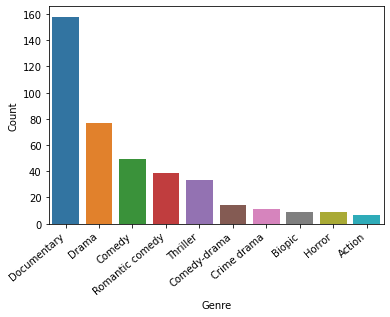

<AxesSubplot:xlabel='Language', ylabel='Count'>

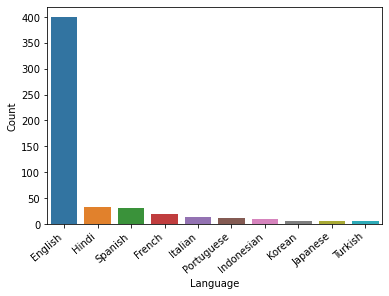

In [13]:
sortType = widgets.RadioButtons(
    options=[('View Genre Distribution', 0), ('View Language Distribution', 1)],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='',
    disabled=False
)
display(sortType)

button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
display(button)

def browseTop10(b):
    if sortType.value == 0:
        df = pd.DataFrame(columns = ['Genre', 'Count'])
        cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
        cursor = cnx.cursor()
        query = "SELECT Genre, Count(*) FROM Netflix GROUP BY Genre ORDER BY Count(*) DESC LIMIT 10;"
        cursor.execute(query)
        i=1
        for name in cursor:
            df = df.append([{'Genre': name[0], 'Count': int(name[1])}], ignore_index=True)
        cursor.close()
        cnx.close()
        plot = sns.barplot(x = df["Genre"], y = df["Count"])
        plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
        display(plot)
    if sortType.value == 1:
        df = pd.DataFrame(columns = ['Genre', 'Count'])
        cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
        cursor = cnx.cursor()
        query = "SELECT Language, COUNT(*) From Netflix GROUP BY Language ORDER BY COUNT(*) DESC LIMIT 10;"
        cursor.execute(query)
        i=1
        for name in cursor:
            df = df.append([{'Language': name[0], 'Count': int(name[1])}], ignore_index=True)
        cursor.close()
        cnx.close()
        plot = sns.barplot(x = df["Language"], y = df["Count"])
        plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
        display(plot)

button.on_click(browseTop10)

In [14]:
date = widgets.DatePicker(
    description='Find number of movies released since:',
    style={'description_width': 'initial'},
    disabled=False,
    layout=widgets.Layout(width='50%')
)
display(date)

button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
display(button)

def browseByDate(b):
    cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
    cursor = cnx.cursor()
    query = "SELECT COUNT(*) FROM Netflix WHERE Date >= '" + str(date.value) + "';"
    cursor.execute(query)
    i=1
    for name in cursor:
        print("There have been " + str(name[0]) + " movies released since " + str(date.value) + ".")
    cursor.close()
    cnx.close()

button.on_click(browseByDate)

DatePicker(value=None, description='Find number of movies released since:', layout=Layout(width='50%'), style=…

Button(description='Search', icon='check', style=ButtonStyle(), tooltip='Click me')

There have been 188 movies released since 2020-06-28.


In [15]:
#within runtime
runtime = widgets.IntRangeSlider(
    value=[10, 50],
    min=0,
    max=210,
    step=1,
    description='Number of Movies with Runtimes between (minutes):',
    style={'description_width': 'initial'},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=widgets.Layout(width='65%')
)
display(runtime)

button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
display(button)

def browseByRuntime2(b):
    minimum = int(runtime.value[0])
    maximum = int(runtime.value[1])
    cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
    cursor = cnx.cursor()
    query = "SELECT COUNT(*) FROM Netflix WHERE RUNTIME >=" + str(minimum) + " AND RUNTIME <= " + str(maximum) + ";"
    cursor.execute(query)
    for name in cursor:
        print("There are " + str(name[0]) + " films between " + str(minimum) + " and " + str(maximum) + " minutes.")
    cursor.close()
    cnx.close()
    #name[0] = id, name[1] = title, name[2] = Genre, name[3] = release date, name[4] = runtime, name[5] = IMDB score
    #name[6] = language

button.on_click(browseByRuntime2)


IntRangeSlider(value=(10, 50), continuous_update=False, description='Number of Movies with Runtimes between (m…

Button(description='Search', icon='check', style=ButtonStyle(), tooltip='Click me')

There are 453 films between 85 and 166 minutes.
There are 57 films between 123 and 166 minutes.
There are 12 films between 144 and 186 minutes.


In [16]:
#imdb score
scoreRange = widgets.FloatRangeSlider(
    value=[0, 50],
    min=0,
    max=10,
    step=0.1,
    description='Movies within rating range:',
    style={'description_width': 'initial'},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%')
)
display(scoreRange)

button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
display(button)


def browseScoreRange(b):
    minimum = float(scoreRange.value[0])
    maximum = float(scoreRange.value[1])
    cnx = mysql.connector.connect(user='root', password=pw, host='127.0.0.1', database='project351')
    cursor = cnx.cursor()
    query = "SELECT COUNT(*) FROM Netflix WHERE IMDB_Score >=" + str(minimum) + " AND IMDB_Score <= " + str(maximum) + ";"
    cursor.execute(query)
    for name in cursor:
        print("There are " + str(name[0]) + " films with an IMDB Score between " + str(minimum) + " and " + str(maximum) + ".")
    cursor.close()
    cnx.close()
    
    
button.on_click(browseScoreRange)


FloatRangeSlider(value=(0.0, 10.0), continuous_update=False, description='Movies within rating range:', layout…

Button(description='Search', icon='check', style=ButtonStyle(), tooltip='Click me')

There are 475 films with an IMDB Score between 3.4 and 7.1.
There are 0 films with an IMDB Score between 9.0 and 10.0.
There are 23 films with an IMDB Score between 7.8 and 9.0.
